In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/posttal-code-to-geo-new/pstl_code_to_geo_new.parquet
/kaggle/input/test-contrbtrs2/cntrbtrs_clnts_ops_tst.csv
/kaggle/input/ai-hack-pfo/train_data/sample_submission.csv
/kaggle/input/ai-hack-pfo/train_data/trnsctns_ops_trn.csv
/kaggle/input/ai-hack-pfo/train_data/readme.md
/kaggle/input/ai-hack-pfo/train_data/cntrbtrs_clnts_ops_trn.csv
/kaggle/input/ai-hack-pfo/train_data/dst_dscrptn.docx
/kaggle/input/postal-code-to-geo/pstl_code_to_geo.csv


In [3]:
df = pd.read_csv('/kaggle/input/ai-hack-pfo/train_data/cntrbtrs_clnts_ops_trn.csv', encoding='cp1251', sep=';')

/tmp/ipykernel_30/3357112432.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/ai-hack-pfo/train_data/cntrbtrs_clnts_ops_trn.csv', encoding='cp1251', sep=';')


In [4]:
df

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,64,2005-12-21,96,0,Накопительный период,...,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,70,2009-06-29,283,0,Накопительный период,...,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,69,2006-12-25,88,0,Накопительный период,...,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,62,2013-09-03,1301,0,Накопительный период,...,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,69,2010-12-06,106,0,Накопительный период,...,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,0x4F753559542C8D42923BA0452CB27595,0x3F27AA4D3F5D2145BE5BD14EA1C109E9,ж,1965,59,2013-12-23,490,0,Накопительный период,...,NaN,НИЖНИЙ НОВГОРОД Г,NaN,603070,2.200000e+10,нет,нет,нет,нет,нет
532821,3,0x943D2C768A4FB38311E65BA1D3F4228C,0x943D2C768A4FB38311E65BA1D3F4228E,м,1956,68,2008-05-28,307,0,Накопительный период,...,NaN,ПЕТРОЗАВОДСК Г,NaN,185030,8.600000e+10,нет,нет,нет,нет,нет
532822,0,0x35F03CB3F4E2564C88D8C511C3E2B999,0x8DF10E30BE38834793B5B0FA2A321FA4,м,1959,65,2010-12-15,97,0,Накопительный период,...,ЧИШМИНСКИЙ Р-Н,NaN,АЛКИНО-2 С,452155,8.000000e+10,нет,нет,нет,нет,нет
532823,0,0x1F9C3E2874FDCB43A6C8B5930C8C2C0E,0x2AF087405B415546B8936841391ACDD4,ж,1959,65,2010-11-03,139,0,Накопительный период,...,NaN,МИЧУРИНСК Г,NaN,393761,6.800000e+10,нет,нет,нет,нет,нет


In [5]:
df.dtypes

slctn_nmbr          int64
clnt_id            object
accnt_id           object
gndr               object
brth_yr             int64
prsnt_age           int64
accnt_bgn_date     object
cprtn_prd_d         int64
erly_pnsn_flg       int64
accnt_status       object
pnsn_age            int64
prvs_npf           object
brth_plc           object
addrss_type        object
rgn                object
dstrct             object
city               object
sttlmnt            object
pstl_code          object
okato             float64
phn                object
email              object
lk                 object
assgn_npo          object
assgn_ops          object
dtype: object

In [6]:
num = df.columns[df.dtypes == 'int64'].drop(['brth_yr', 'slctn_nmbr'])
num

Index(['prsnt_age', 'cprtn_prd_d', 'erly_pnsn_flg', 'pnsn_age'], dtype='object')

In [7]:
dat = pd.Index(['accnt_bgn_date', 'brth_yr'])
dat

Index(['accnt_bgn_date', 'brth_yr'], dtype='object')

In [8]:
cat = pd.Index(['gndr', 'accnt_status', 'phn', 'email', 'lk', 'assgn_npo', 'assgn_ops', 'addrss_type', 'slctn_nmbr'])
cat

Index(['gndr', 'accnt_status', 'phn', 'email', 'lk', 'assgn_npo', 'assgn_ops',
       'addrss_type', 'slctn_nmbr'],
      dtype='object')

In [9]:
obj = df.dtypes.drop(dat.append(num).append(cat)).index
obj

Index(['clnt_id', 'accnt_id', 'prvs_npf', 'brth_plc', 'rgn', 'dstrct', 'city',
       'sttlmnt', 'pstl_code', 'okato'],
      dtype='object')

In [10]:
geo = obj.drop(['clnt_id', 'accnt_id', 'okato'])
geo

Index(['prvs_npf', 'brth_plc', 'rgn', 'dstrct', 'city', 'sttlmnt',
       'pstl_code'],
      dtype='object')

In [11]:
df[geo].nunique()

prvs_npf        183
brth_plc     309811
rgn             102
dstrct         2332
city           2025
sttlmnt       26083
pstl_code     39601
dtype: int64

In [12]:
# df[dat] = pd.to_datetime(df[dat]
df['accnt_bgn_date'] = pd.to_datetime(df['accnt_bgn_date'])
df['brth_yr'] = pd.to_datetime(df['brth_yr'], format="%Y")
df[cat] = df[cat].astype('category')
df[obj] = df[obj].astype('object') # have geo subtype
# num


In [13]:
semi_cat = obj[df[obj].nunique() < 200]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   slctn_nmbr      532825 non-null  category      
 1   clnt_id         532825 non-null  object        
 2   accnt_id        532825 non-null  object        
 3   gndr            532825 non-null  category      
 4   brth_yr         532825 non-null  datetime64[ns]
 5   prsnt_age       532825 non-null  int64         
 6   accnt_bgn_date  532825 non-null  datetime64[ns]
 7   cprtn_prd_d     532825 non-null  int64         
 8   erly_pnsn_flg   532825 non-null  int64         
 9   accnt_status    532825 non-null  category      
 10  pnsn_age        532825 non-null  int64         
 11  prvs_npf        469411 non-null  object        
 12  brth_plc        532825 non-null  object        
 13  addrss_type     532825 non-null  category      
 14  rgn             532133 non-null  obj

In [15]:
df[num].describe()

,prsnt_age,cprtn_prd_d,erly_pnsn_flg,pnsn_age
count,532825.000000,532825.000000,532825.000000,532825.000000
mean,64.142499,324.073215,0.036367,57.073424
std,3.693279,581.011155,0.187201,2.566922
min,37.000000,0.000000,0.000000,55.000000
25%,62.000000,108.000000,0.000000,55.000000
50%,64.000000,182.000000,0.000000,55.000000
75%,66.000000,326.000000,0.000000,60.000000
max,99.000000,7269.000000,1.000000,65.000000


In [16]:
df[dat].describe()

,accnt_bgn_date,brth_yr
count,532825,532825
mean,2009-05-25 02:38:49.174493952,1959-11-10 07:47:16.198001152
min,2004-08-24 00:00:00,1925-01-01 00:00:00
25%,2006-11-29 00:00:00,1958-01-01 00:00:00
50%,2009-05-04 00:00:00,1960-01-01 00:00:00
75%,2011-06-20 00:00:00,1962-01-01 00:00:00
max,2023-11-21 00:00:00,1987-01-01 00:00:00


In [17]:
df.describe(include=['category'])

,slctn_nmbr,gndr,accnt_status,addrss_type,phn,email,lk,assgn_npo,assgn_ops
count,532825,532825,532825,532825,532825,532825,532825,532825,532825
unique,4,2,2,4,2,2,2,2,2
top,0,ж,Накопительный период,Адрес места жительства,нет,нет,нет,нет,нет
freq,314007,343320,511517,437883,528390,532395,448437,532708,529470


In [18]:
df[semi_cat].astype('category').describe(include=['category'])

,prvs_npf,rgn,okato
count,469411,532133,5.321330e+05
unique,183,102,9.100000e+01
top,СФР,СВЕРДЛОВСКАЯ ОБЛ,6.500000e+10
freq,426454,44925,4.492500e+04


In [19]:
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   prsnt_age      532825 non-null  int64
 1   cprtn_prd_d    532825 non-null  int64
 2   erly_pnsn_flg  532825 non-null  int64
 3   pnsn_age       532825 non-null  int64
dtypes: int64(4)
memory usage: 16.3 MB


In [240]:
df[dat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   accnt_bgn_date  532825 non-null  datetime64[ns]
 1   brth_yr         532825 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.1 MB


In [20]:
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   gndr          532825 non-null  category
 1   accnt_status  532825 non-null  category
 2   phn           532825 non-null  category
 3   email         532825 non-null  category
 4   lk            532825 non-null  category
 5   assgn_npo     532825 non-null  category
 6   assgn_ops     532825 non-null  category
 7   addrss_type   532825 non-null  category
 8   slctn_nmbr    532825 non-null  category
dtypes: category(9)
memory usage: 4.6 MB


In [21]:
df[obj].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   clnt_id    532825 non-null  object
 1   accnt_id   532825 non-null  object
 2   prvs_npf   469411 non-null  object
 3   brth_plc   532825 non-null  object
 4   rgn        532133 non-null  object
 5   dstrct     200421 non-null  object
 6   city       378555 non-null  object
 7   sttlmnt    159599 non-null  object
 8   pstl_code  532825 non-null  object
 9   okato      532133 non-null  object
dtypes: object(10)
memory usage: 40.7+ MB


In [22]:
df[geo]

,prvs_npf,brth_plc,rgn,dstrct,city,sttlmnt,pstl_code
0,СФР,"1,ГОР. НОВОСИБИРСК",ОМСКАЯ ОБЛ,NaN,ОМСК Г,NaN,644001
1,СФР,"1,Г.БЕЛОГОРСК АМУРСКОЙ ОБЛ",АМУРСКАЯ ОБЛ,NaN,БЕЛОГОРСК Г,NaN,676852
2,СФР,"1,,,МОСКВА,",МОСКВА Г,NaN,NaN,NaN,109451
3,NaN,"1,Д. ДОБРОМЫШ АЛЬМЕТЬЕВСКОГО Р-НА ТАТАРСКОЙ АССР",ТАТАРСТАН РЕСП,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464
4,СФР,УДМУРТСКАЯ АССР ИГРИНСКИЙ СВЕТЛЯНА,УДМУРТСКАЯ РЕСП,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415
...,...,...,...,...,...,...,...
532820,СФР,"1,ГОР. ГОРЬКИЙ",НИЖЕГОРОДСКАЯ ОБЛ,NaN,НИЖНИЙ НОВГОРОД Г,NaN,603070
532821,СФР,"1,ГОРНОЗАВОДСК,,ПЕРМСКАЯ ОБЛАСТЬ,",КАРЕЛИЯ РЕСП,NaN,ПЕТРОЗАВОДСК Г,NaN,185030
532822,СФР,"0,БАШКИРСКАЯ АССР, БЛАГОВАРСКИЙ, КАЗАРМА 705 КМ",БАШКОРТОСТАН РЕСП,ЧИШМИНСКИЙ Р-Н,NaN,АЛКИНО-2 С,452155
532823,"НПФ ""НПФ ОПК""","1,С. СТАЕВО",ТАМБОВСКАЯ ОБЛ,NaN,МИЧУРИНСК Г,NaN,393761


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

<Axes: xlabel='prsnt_age', ylabel='Probability'>

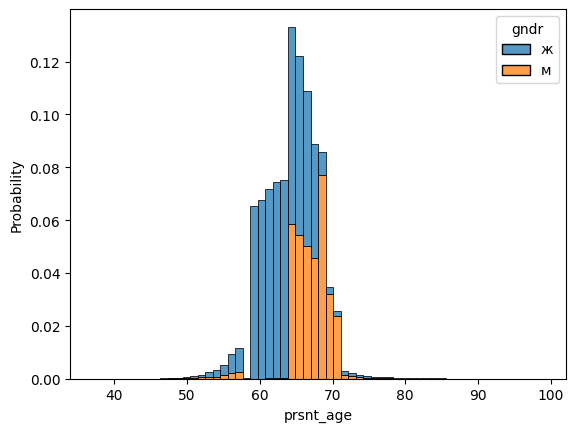

In [250]:
sns.histplot(x='prsnt_age', hue='gndr', data=df, bins=60, stat='probability', multiple='stack')

In [42]:
!pip install pgeocode

In [56]:
import concurrent.futures
import pgeocode

nomi = pgeocode.Nominatim('ru')

new_geo = ['place_name', 'state_name', 'state_code', 'latitude', 'longitude']

def query_postal_code(code):
    return nomi.query_postal_code(str(code))[new_geo]

# codes = df['pstl_code'].unique()
codes = new_pstl_code


with concurrent.futures.ThreadPoolExecutor() as executor:
    future_to_code = {executor.submit(query_postal_code, code): code for code in codes}

    results = {}
    for future in concurrent.futures.as_completed(future_to_code):
        code = future_to_code[future]
        try:
            results[code] = future.result()
        except Exception as exc:
            print(f'Code {code} generated an exception: {exc}')

df_codes = pd.DataFrame.from_dict(results, orient='index')

df_codes

,place_name,state_name,state_code,latitude,longitude
397135,Липяги,Воронежская Область,86.0,51.5742,41.8303
620077,Екатеринбург 77,Свердловская Область,71.0,56.8575,60.6125
307715,Большие Угоны,Курская Область,41.0,51.5906,35.4172
420125,NaN,NaN,NaN,NaN,NaN
140110,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
162696,Угрюмово,Вологодская Область,85.0,59.4000,38.1500
143410,NaN,NaN,NaN,NaN,NaN
42735,NaN,NaN,NaN,NaN,NaN
462125,Красногор,Оренбургская Область,55.0,51.5642,56.1175


In [57]:
not_null_codes = df_codes[~df_codes['latitude'].isnull()]
not_null_codes

,place_name,state_name,state_code,latitude,longitude
397135,Липяги,Воронежская Область,86.0,51.5742,41.8303
620077,Екатеринбург 77,Свердловская Область,71.0,56.8575,60.6125
307715,Большие Угоны,Курская Область,41.0,51.5906,35.4172
174200,Зуево,Новгородская Область,52.0,59.1833,31.5333
155136,Подозерский,Ивановская Область,21.0,57.2153,40.3386
...,...,...,...,...,...
606677,Заболотное,Нижегородская Область,51.0,56.9944,43.2522
164123,Трофимовская,Архангельская Область,6.0,61.7897,39.1631
162696,Угрюмово,Вологодская Область,85.0,59.4000,38.1500
462125,Красногор,Оренбургская Область,55.0,51.5642,56.1175


In [59]:
not_null_codes.to_parquet('pstl_code_to_geo_new.parquet')

In [58]:
not_null_codes.to_csv('pstl_code_to_geo_new.csv')

In [64]:
not_null_codes = pd.read_csv('/kaggle/input/postal-code-to-geo/pstl_code_to_geo.csv', index_col='Unnamed: 0')

In [248]:
new_geo = not_null_codes.columns
not_null_codes

,place_name,state_name,state_code,latitude,longitude
352634,Белореченск 4,Краснодарский Край,38.0,44.7600,39.8700
353235,Афипский,Краснодарский Край,38.0,44.9000,38.8400
404101,Волжский 1,Волгоградская Область,84.0,48.7906,44.7717
610040,Киров 40,Кировская Область,33.0,56.6118,44.0550
625001,Тюмень 1,Тюменская Область,78.0,57.1522,65.5272
...,...,...,...,...,...
399949,Буховое,Липецкая Область,43.0,53.0603,39.9586
452478,Кандаковка,Башкортостан Республика,8.0,55.5986,58.4769
422882,Чувашский Брод,Татарстан Республика,73.0,54.7333,50.1000
157094,Андреевское,Костромская Область,37.0,58.1622,41.2953


In [27]:
mrg = df.merge(not_null_codes, how='inner', left_on='pstl_code', right_index=True)
mrg = mrg.groupby(mrg.index).first()
mrg

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,phn,email,lk,assgn_npo,assgn_ops,place_name,state_name,state_code,latitude,longitude
32768,2,0x02E3471E6B8F964C847A9DB46F0532FB,0x1DE49368E106E44F84ED0C1551B54461,ж,1964-01-01,60,2012-10-22,129,0,Накопительный период,...,нет,нет,нет,нет,нет,Нижневартовск 15,Тюменская Область,78.0,61.2412,77.4858
32769,0,0x534BB27C75D949499AF0EB0C5F168B4D,0x74AEA5A184AB0D4F83725D1C93D7DA0B,м,1960-01-01,64,2010-10-07,166,0,Накопительный период,...,нет,нет,нет,нет,нет,Нижний Тагил 18,Свердловская Область,71.0,57.9194,59.9650
32770,3,0x943D2C768A4FB38311E65ED63B337E2F,0x943D2C768A4FB38311E65ED63B337E31,ж,1951-01-01,73,2010-08-31,203,0,Накопительный период,...,нет,нет,нет,нет,нет,Красноярск 60,Красноярский Край,91.0,56.3990,92.4783
32771,0,0x0B83F518F7AD31408881B81602B2217F,0x1C5731C0FA2D624DBB570E451715FB9A,ж,1955-01-01,69,2010-11-30,121,0,Накопительный период,...,нет,нет,нет,нет,нет,Орел 26,Орловская Область,56.0,53.0747,36.2468
32772,0,0x60D0CC94100E4342BA8DF50B32338AD7,0xE4D8EE813482AF48940AA7D4277AD48A,ж,1960-01-01,64,2006-12-25,88,0,Накопительный период,...,нет,нет,нет,нет,нет,Ижевск 28,Удмуртская Республика,80.0,56.8500,53.2333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,0x4F753559542C8D42923BA0452CB27595,0x3F27AA4D3F5D2145BE5BD14EA1C109E9,ж,1965-01-01,59,2013-12-23,490,0,Накопительный период,...,нет,нет,нет,нет,нет,Нижний Новгород 70,Нижегородская Область,51.0,56.3287,44.0020
532821,3,0x943D2C768A4FB38311E65BA1D3F4228C,0x943D2C768A4FB38311E65BA1D3F4228E,м,1956-01-01,68,2008-05-28,307,0,Накопительный период,...,нет,нет,нет,нет,нет,Петрозаводск 30,Карелия Республика,28.0,61.7849,34.3469
532822,0,0x35F03CB3F4E2564C88D8C511C3E2B999,0x8DF10E30BE38834793B5B0FA2A321FA4,м,1959-01-01,65,2010-12-15,97,0,Накопительный период,...,нет,нет,нет,нет,нет,Алкино,Башкортостан Республика,8.0,53.7300,52.2300
532823,0,0x1F9C3E2874FDCB43A6C8B5930C8C2C0E,0x2AF087405B415546B8936841391ACDD4,ж,1959-01-01,65,2010-11-03,139,0,Накопительный период,...,нет,нет,нет,нет,нет,Мичуринск 1,Тамбовская Область,72.0,52.8967,40.4994


In [63]:
not_null_codes_new = pd.read_parquet('/kaggle/input/posttal-code-to-geo-new/pstl_code_to_geo_new.parquet')
new_df = pd.read_csv('/kaggle/input/test-contrbtrs2/cntrbtrs_clnts_ops_tst.csv', encoding='cp1251', sep=';')

In [60]:
new_df

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,accnt_status,pnsn_age,...,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0x974BA5AD563F3B4BA6573C9C32CC9886,0x828738D13E70E44D9A97F595ADBC4A33,ж,1960,64,2005-12-16,101,Накопительный период,55,...,NaN,ВОРОНЕЖ Г,NaN,394010,2.000000e+10,нет,нет,нет,нет,нет
1,0,0x847B12D73A12B542BB738100FB707B65,0xA4F3243B96C17B4B93C3663D72B69908,ж,1962,62,2013-08-24,611,Накопительный период,55,...,NaN,КОПЕЙСК Г,NaN,456617,7.500000e+10,нет,нет,нет,нет,нет
2,2,0x7C9761CD533BA348B596A5508619A07F,0xFBBAE15788845B4D8157D792BB6222F9,м,1958,66,2009-10-21,169,Накопительный период,60,...,ИГРИНСКИЙ Р-Н,NaN,ИГРА,427140,9.400000e+10,нет,нет,нет,нет,нет
3,3,0x9FB59DBE013CAB1148F8F25756CD0977,0xB98E7310C5553FEB476161B4D476ADD2,м,1956,68,2012-01-17,434,Накопительный период,60,...,NaN,НЯГАНЬ Г.,NaN,628181,7.110000e+10,нет,нет,нет,нет,нет
4,0,0xAE60A022A11C2B4499AC4C797AAFB925,0x86E0FDE4D9B0194B90DC0B1451D33AD1,м,1953,71,2005-12-22,95,Накопительный период,60,...,NaN,УЛЬЯНОВСК Г,NaN,432008,7.300000e+10,нет,нет,нет,нет,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94024,3,0x943D2C768A4FB38311E658EB44E446BD,0x943D2C768A4FB38311E658EB44E446BF,м,1955,69,2004-09-24,97,Накопительный период,60,...,NaN,КАМЕНСК-УРАЛЬСКИЙ Г,NaN,623409,6.500000e+10,нет,нет,нет,нет,нет
94025,0,0xBC50E7BD2A3D054DBCA8FF977D19EABE,0x0AC44A307F9EC94A9EDE212B742516C8,ж,1964,60,2008-01-21,436,Накопительный период,55,...,NaN,ВОЛОГДА Г,МОЛОЧНОЕ С,160555,1.900000e+10,нет,нет,нет,нет,нет
94026,0,0x9744A544CB5A974D934556B13D8CF134,0x0C740A2321B65B4E979FE15EB6AB38A2,м,1959,65,2005-12-06,111,Накопительный период,60,...,КОТЛАССКИЙ Р-Н,КОТЛАС Г,NaN,165300,1.100000e+10,нет,нет,нет,нет,нет
94027,3,0x943D2C768A4FB38311E65DD7AF1A5925,0x943D2C768A4FB38311E65DD7AF1A5927,ж,1962,62,2009-05-06,337,Накопительный период,55,...,NaN,АНГАРСК Г,NaN,665806,2.500000e+10,нет,нет,да,нет,нет


In [70]:
new_pstl_code = new_df[~new_df['pstl_code'].isin(mrg['pstl_code'])]['pstl_code'].unique()
new_pstl_code

array([347943, 618420, 385633, ..., 606414,  42735, 162696])

In [71]:
not_null_codes_new[not_null_codes_new.index.isin(mrg['pstl_code'].unique())]

,place_name,state_name,state_code,latitude,longitude


In [80]:
not_null_codes.loc[mrg['pstl_code'].unique()]

,place_name,state_name,state_code,latitude,longitude
628615,Нижневартовск 15,Тюменская Область,78.0,61.2412,77.4858
628615,Нижневартовск 15,Тюменская Область,78.0,61.2412,77.4858
622018,Нижний Тагил 18,Свердловская Область,71.0,57.9194,59.9650
622018,Нижний Тагил 18,Свердловская Область,71.0,57.9194,59.9650
660060,Красноярск 60,Красноярский Край,91.0,56.3990,92.4783
...,...,...,...,...,...
399949,Буховое,Липецкая Область,43.0,53.0603,39.9586
452478,Кандаковка,Башкортостан Республика,8.0,55.5986,58.4769
157094,Андреевское,Костромская Область,37.0,58.1622,41.2953
422882,Чувашский Брод,Татарстан Республика,73.0,54.7333,50.1000


In [84]:
# not_null_codes_new.append(not_null_codes.loc[mrg['pstl_code'].unique()])
pd.concat([not_null_codes_new,not_null_codes.loc[mrg['pstl_code'].unique()]], ignore_index=True)

,place_name,state_name,state_code,latitude,longitude
0,Липяги,Воронежская Область,86.0,51.5742,41.8303
1,Екатеринбург 77,Свердловская Область,71.0,56.8575,60.6125
2,Большие Угоны,Курская Область,41.0,51.5906,35.4172
3,Зуево,Новгородская Область,52.0,59.1833,31.5333
4,Подозерский,Ивановская Область,21.0,57.2153,40.3386
...,...,...,...,...,...
37397,Буховое,Липецкая Область,43.0,53.0603,39.9586
37398,Кандаковка,Башкортостан Республика,8.0,55.5986,58.4769
37399,Андреевское,Костромская Область,37.0,58.1622,41.2953
37400,Чувашский Брод,Татарстан Республика,73.0,54.7333,50.1000


In [85]:
,
new_df.merge(pd.concat([not_null_codes_new,not_null_codes.loc[mrg['pstl_code'].unique()]], ignore_index=True), how='left', left_on='pstl_code', right_index=True)

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,accnt_status,pnsn_age,...,phn,email,lk,assgn_npo,assgn_ops,place_name,state_name,state_code,latitude,longitude
0,0,0x974BA5AD563F3B4BA6573C9C32CC9886,0x828738D13E70E44D9A97F595ADBC4A33,ж,1960,64,2005-12-16,101,Накопительный период,55,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
1,0,0x847B12D73A12B542BB738100FB707B65,0xA4F3243B96C17B4B93C3663D72B69908,ж,1962,62,2013-08-24,611,Накопительный период,55,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
2,2,0x7C9761CD533BA348B596A5508619A07F,0xFBBAE15788845B4D8157D792BB6222F9,м,1958,66,2009-10-21,169,Накопительный период,60,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
3,3,0x9FB59DBE013CAB1148F8F25756CD0977,0xB98E7310C5553FEB476161B4D476ADD2,м,1956,68,2012-01-17,434,Накопительный период,60,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
4,0,0xAE60A022A11C2B4499AC4C797AAFB925,0x86E0FDE4D9B0194B90DC0B1451D33AD1,м,1953,71,2005-12-22,95,Накопительный период,60,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94024,3,0x943D2C768A4FB38311E658EB44E446BD,0x943D2C768A4FB38311E658EB44E446BF,м,1955,69,2004-09-24,97,Накопительный период,60,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
94025,0,0xBC50E7BD2A3D054DBCA8FF977D19EABE,0x0AC44A307F9EC94A9EDE212B742516C8,ж,1964,60,2008-01-21,436,Накопительный период,55,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
94026,0,0x9744A544CB5A974D934556B13D8CF134,0x0C740A2321B65B4E979FE15EB6AB38A2,м,1959,65,2005-12-06,111,Накопительный период,60,...,нет,нет,нет,нет,нет,NaN,NaN,NaN,NaN,NaN
94027,3,0x943D2C768A4FB38311E65DD7AF1A5925,0x943D2C768A4FB38311E65DD7AF1A5927,ж,1962,62,2009-05-06,337,Накопительный период,55,...,нет,нет,да,нет,нет,NaN,NaN,NaN,NaN,NaN


In [311]:
df = df.merge(not_null_codes, how='inner', left_on='pstl_code', right_index=True)
df = df.groupby(df.index).first()
df

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,phn,email,lk,assgn_npo,assgn_ops,place_name,state_name,state_code,latitude,longitude
32768,2,0x02E3471E6B8F964C847A9DB46F0532FB,0x1DE49368E106E44F84ED0C1551B54461,ж,1964-01-01,60,2012-10-22,129,0,Накопительный период,...,нет,нет,нет,нет,нет,Нижневартовск 15,Тюменская Область,78.0,61.2412,77.4858
32769,0,0x534BB27C75D949499AF0EB0C5F168B4D,0x74AEA5A184AB0D4F83725D1C93D7DA0B,м,1960-01-01,64,2010-10-07,166,0,Накопительный период,...,нет,нет,нет,нет,нет,Нижний Тагил 18,Свердловская Область,71.0,57.9194,59.9650
32770,3,0x943D2C768A4FB38311E65ED63B337E2F,0x943D2C768A4FB38311E65ED63B337E31,ж,1951-01-01,73,2010-08-31,203,0,Накопительный период,...,нет,нет,нет,нет,нет,Красноярск 60,Красноярский Край,91.0,56.3990,92.4783
32771,0,0x0B83F518F7AD31408881B81602B2217F,0x1C5731C0FA2D624DBB570E451715FB9A,ж,1955-01-01,69,2010-11-30,121,0,Накопительный период,...,нет,нет,нет,нет,нет,Орел 26,Орловская Область,56.0,53.0747,36.2468
32772,0,0x60D0CC94100E4342BA8DF50B32338AD7,0xE4D8EE813482AF48940AA7D4277AD48A,ж,1960-01-01,64,2006-12-25,88,0,Накопительный период,...,нет,нет,нет,нет,нет,Ижевск 28,Удмуртская Республика,80.0,56.8500,53.2333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,0x4F753559542C8D42923BA0452CB27595,0x3F27AA4D3F5D2145BE5BD14EA1C109E9,ж,1965-01-01,59,2013-12-23,490,0,Накопительный период,...,нет,нет,нет,нет,нет,Нижний Новгород 70,Нижегородская Область,51.0,56.3287,44.0020
532821,3,0x943D2C768A4FB38311E65BA1D3F4228C,0x943D2C768A4FB38311E65BA1D3F4228E,м,1956-01-01,68,2008-05-28,307,0,Накопительный период,...,нет,нет,нет,нет,нет,Петрозаводск 30,Карелия Республика,28.0,61.7849,34.3469
532822,0,0x35F03CB3F4E2564C88D8C511C3E2B999,0x8DF10E30BE38834793B5B0FA2A321FA4,м,1959-01-01,65,2010-12-15,97,0,Накопительный период,...,нет,нет,нет,нет,нет,Алкино,Башкортостан Республика,8.0,53.7300,52.2300
532823,0,0x1F9C3E2874FDCB43A6C8B5930C8C2C0E,0x2AF087405B415546B8936841391ACDD4,ж,1959-01-01,65,2010-11-03,139,0,Накопительный период,...,нет,нет,нет,нет,нет,Мичуринск 1,Тамбовская Область,72.0,52.8967,40.4994


In [277]:
df[new_geo]

,place_name,state_name,state_code,latitude,longitude
32768,Нижневартовск 15,Тюменская Область,78.0,61.2412,77.4858
32769,Нижний Тагил 18,Свердловская Область,71.0,57.9194,59.9650
32770,Красноярск 60,Красноярский Край,91.0,56.3990,92.4783
32771,Орел 26,Орловская Область,56.0,53.0747,36.2468
32772,Ижевск 28,Удмуртская Республика,80.0,56.8500,53.2333
...,...,...,...,...,...
532820,Нижний Новгород 70,Нижегородская Область,51.0,56.3287,44.0020
532821,Петрозаводск 30,Карелия Республика,28.0,61.7849,34.3469
532822,Алкино,Башкортостан Республика,8.0,53.7300,52.2300
532823,Мичуринск 1,Тамбовская Область,72.0,52.8967,40.4994


In [278]:
df[['place_name','state_name', 'state_code']].nunique()

place_name    22255
state_name       79
state_code       77
dtype: int64

In [279]:
state_flg_mn = df.groupby('state_code')['erly_pnsn_flg'].mean()
state_flg_mn

state_code
1.0     0.025166
3.0     0.049180
4.0     0.016119
5.0     0.028108
6.0     0.060143
          ...   
86.0    0.019742
88.0    0.040671
90.0    0.022769
91.0    0.054266
92.0    0.203540
Name: erly_pnsn_flg, Length: 77, dtype: float64

<Axes: >

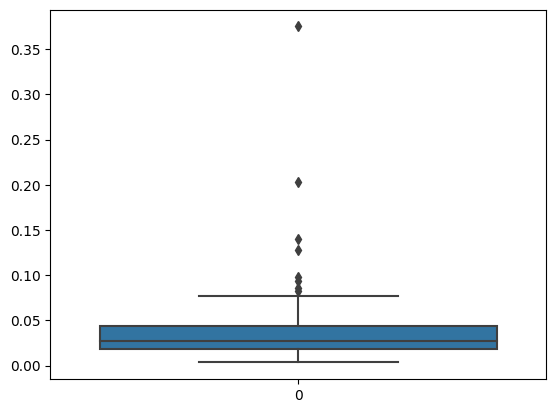

In [280]:
sns.boxplot(state_flg_mn.values)

In [333]:
num_bins = 100

df_ = df.copy()

df_['lat_bin'] = pd.cut(df_['latitude'], bins=num_bins, labels=False)
df_['long_bin'] = pd.cut(df_['longitude'], bins=num_bins, labels=False)

heatmap_data = df_.groupby(['lat_bin', 'long_bin'])['erly_pnsn_flg'].mean().reset_index()

heatmap_data = heatmap_data.pivot(index='lat_bin', columns='long_bin', values='erly_pnsn_flg')

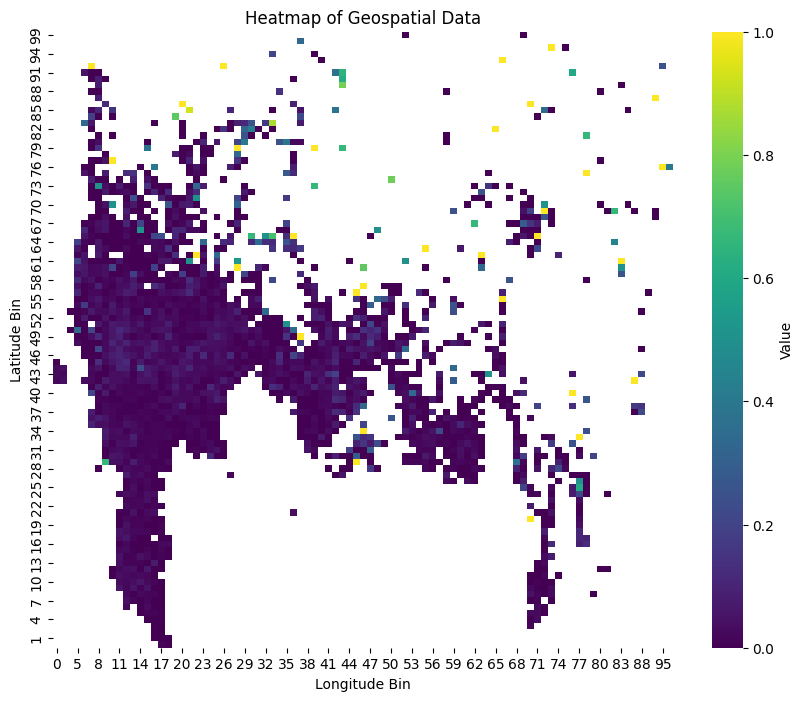

In [334]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data[::-1], cmap='viridis', annot=False, cbar_kws={'label': 'Value'})
plt.title('Heatmap of Geospatial Data')
plt.xlabel('Longitude Bin')
plt.ylabel('Latitude Bin')
plt.show()


In [350]:
region_data = df.groupby('state_code')['erly_pnsn_flg'].mean().reset_index()
df_ = pd.merge(df[[*new_geo, 'erly_pnsn_flg']], region_data, on='state_code', suffixes=('', '_mean'))

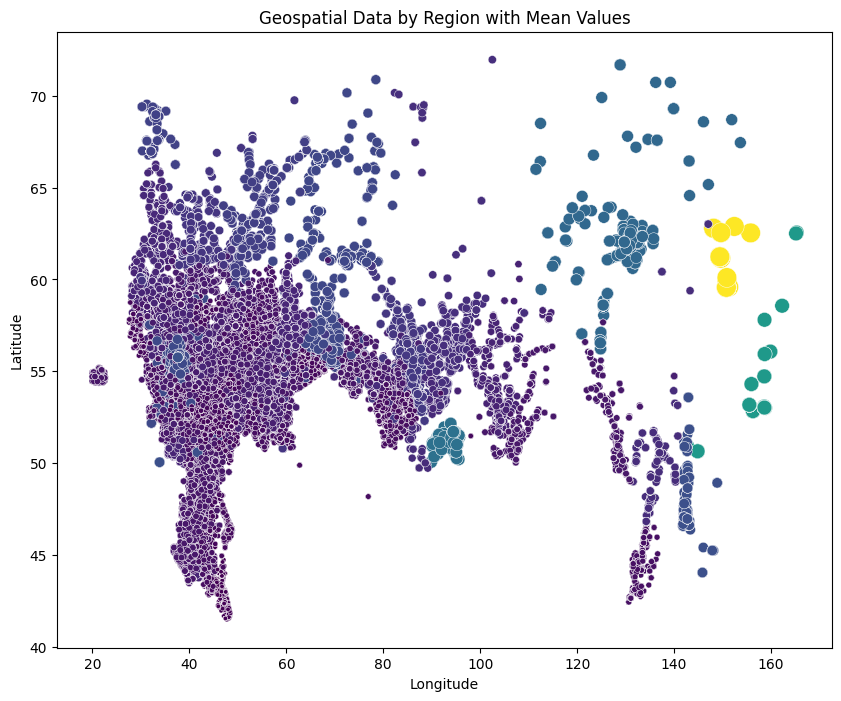

In [355]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_, x='longitude', y='latitude', hue='erly_pnsn_flg_mean', palette='viridis', size='erly_pnsn_flg_mean', sizes=(10, 200), legend=False)
plt.title('Geospatial Data by Region with Mean Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [281]:
q1 = state_flg_mn.quantile(0.25)
q3 = state_flg_mn.quantile(0.75)

out = q3 + 1.5 * (q3 - q1)

state_flg_mn[state_flg_mn >= state_flg_mn.quantile(0.90)]

state_code
44.0    0.375000
47.0    0.085812
48.0    0.097643
63.0    0.127363
64.0    0.093714
78.0    0.082244
79.0    0.140320
92.0    0.203540
Name: erly_pnsn_flg, dtype: float64

In [283]:
not_null_codes.merge(state_flg_mn[state_flg_mn >= out], on='state_code')

,place_name,state_name,state_code,latitude,longitude,erly_pnsn_flg
0,Тюмень 1,Тюменская Область,78.0,57.1522,65.5272,0.082244
1,Москва 5,Москва,48.0,55.7522,37.6156,0.097643
2,Дмитров 2,Московская Область,47.0,56.3500,37.5167,0.085812
3,Москва 114,Москва,48.0,55.7520,37.6150,0.097643
4,Лангепас 2,Тюменская Область,78.0,61.2544,75.2124,0.082244
...,...,...,...,...,...,...
3523,Палатка,Магаданская Область,44.0,60.1000,150.9000,0.375000
3524,Москва 174,Москва,48.0,55.7522,37.6156,0.097643
3525,Алтанцы,Саха (Якутия) Республика,63.0,61.1903,132.1986,0.127363
3526,Москва 39,Москва,48.0,55.7522,37.6156,0.097643


In [286]:
not_null_codes[not_null_codes['state_code'].isin(state_flg_mn[state_flg_mn >= out].index)]['state_name'].unique()

array(['Тюменская Область', 'Москва', 'Московская Область',
       'Сахалинская Область', 'Саха (Якутия) Республика',
       'Тыва Республика', 'Камчатская Область', 'Магаданская Область'],
      dtype=object)

<Axes: xlabel='longitude', ylabel='latitude'>

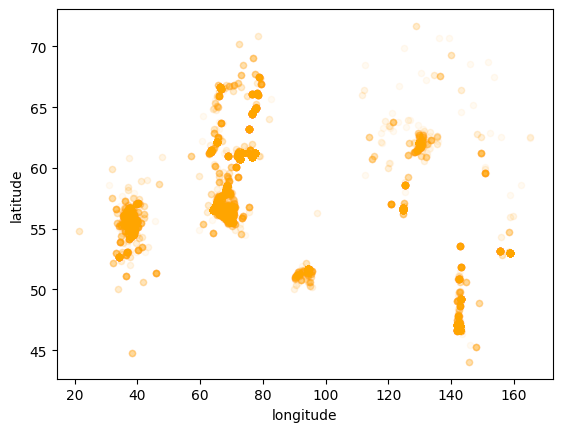

In [317]:
df[df['state_code'].isin(state_flg_mn[state_flg_mn >= out].index)].plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha=0.05, color='orange')

<Axes: xlabel='longitude', ylabel='latitude'>

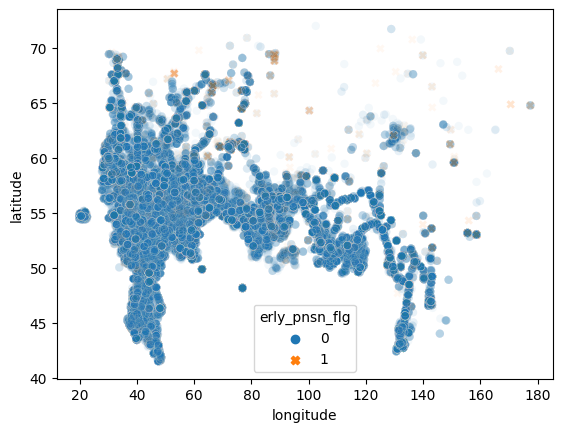

In [290]:
sns.set_palette("tab10")
sns.scatterplot(x='longitude', y='latitude', hue='erly_pnsn_flg', palette='tab10', style='erly_pnsn_flg', data=df, alpha=0.05)

<Axes: xlabel='longitude', ylabel='latitude'>

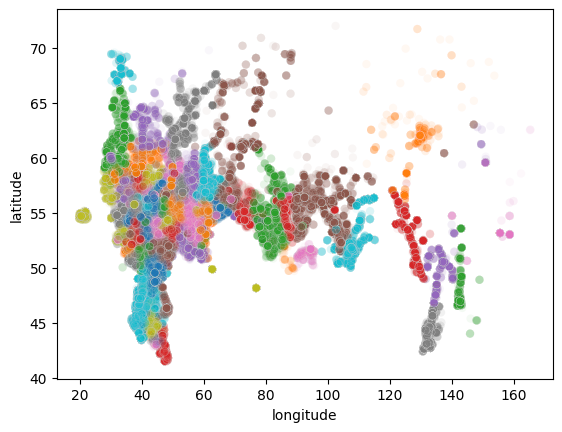

In [291]:
sns.scatterplot(x='longitude', y='latitude', hue='state_code', palette='tab10', data=df, alpha=0.05, legend=False)

In [292]:
for slctn_nmbr, d in df.groupby('slctn_nmbr'):
    print(slctn_nmbr, d.shape, d['erly_pnsn_flg'].mean())

/tmp/ipykernel_31/4049367095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for slctn_nmbr, d in df.groupby('slctn_nmbr'):


0 (288447, 30) 0.01425565181818497
1 (75793, 30) 0.09218529415645245
2 (46741, 30) 0.07081577202028198
3 (80596, 30) 0.04209886346716959


In [295]:
X = df[df['slctn_nmbr'] == 0][['longitude', 'latitude', 'erly_pnsn_flg']]
X

,longitude,latitude,erly_pnsn_flg
32769,59.9650,57.9194,0
32771,36.2468,53.0747,0
32772,53.2333,56.8500,0
32773,49.9253,53.1072,0
32774,59.7400,54.9000,0
...,...,...,...
532818,78.3500,55.3500,0
532819,78.3500,55.3500,0
532820,44.0020,56.3287,0
532822,52.2300,53.7300,0


In [297]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state = 2)

X_t = X.drop(columns=['erly_pnsn_flg']).values
Y_t = X['erly_pnsn_flg'].values

X_train, y_train = sm.fit_resample(X_t, Y_t.ravel())

# X_test, y_test = sm.fit_resample(X_test, y_test.ravel())

In [298]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer, f1_score

kmn = KMeans(n_init=5, max_iter=100)

f1_scorer = make_scorer(f1_score, average='weighted')

model = GridSearchCV(
    kmn,
    {
        'init': ['k-means++', 'random'],
        'n_clusters': np.array(range(2, 16))
    },
    scoring=f1_scorer,
    cv=5
)



model.fit(X_train, y_train)

print(model.best_score_, model.best_params_)

0.5130736850682205 {'init': 'k-means++', 'n_clusters': 2}


In [299]:
be = model.best_estimator_

<Axes: xlabel='longitude', ylabel='latitude'>

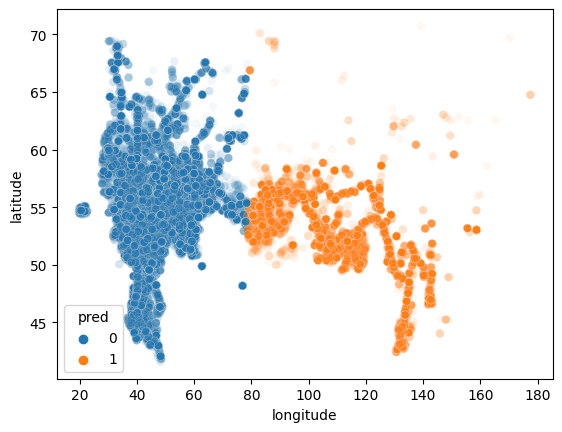

In [300]:
sns.scatterplot(x='longitude', y='latitude', hue='pred', data=X.assign(pred=be.predict(X_t)), palette='tab10', alpha=0.05)

In [304]:
km = KMeans(init='k-means++', max_iter=100, n_clusters=3)
km.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

<Axes: xlabel='longitude', ylabel='latitude'>

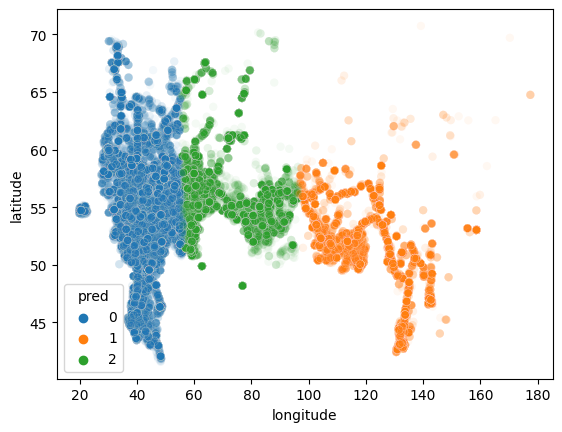

In [305]:
sns.scatterplot(x='longitude', y='latitude', hue='pred', data=X.assign(pred=km.predict(X_t)), palette='tab10', alpha=0.05)

In [ ]:
!pip install geopandas contextily

In [312]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df[['longitude', 'latitude', 'erly_pnsn_flg']], geometry=geometry)

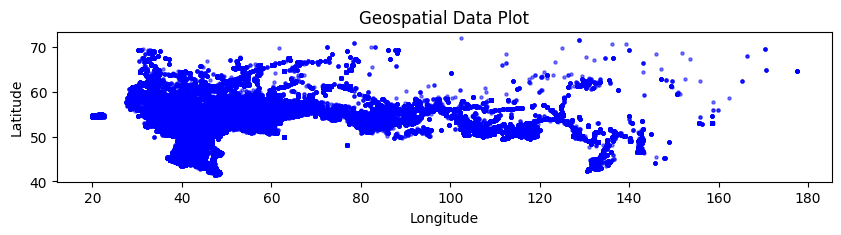

In [313]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title('Geospatial Data Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [314]:
gdf = gdf.set_crs(epsg=3857)

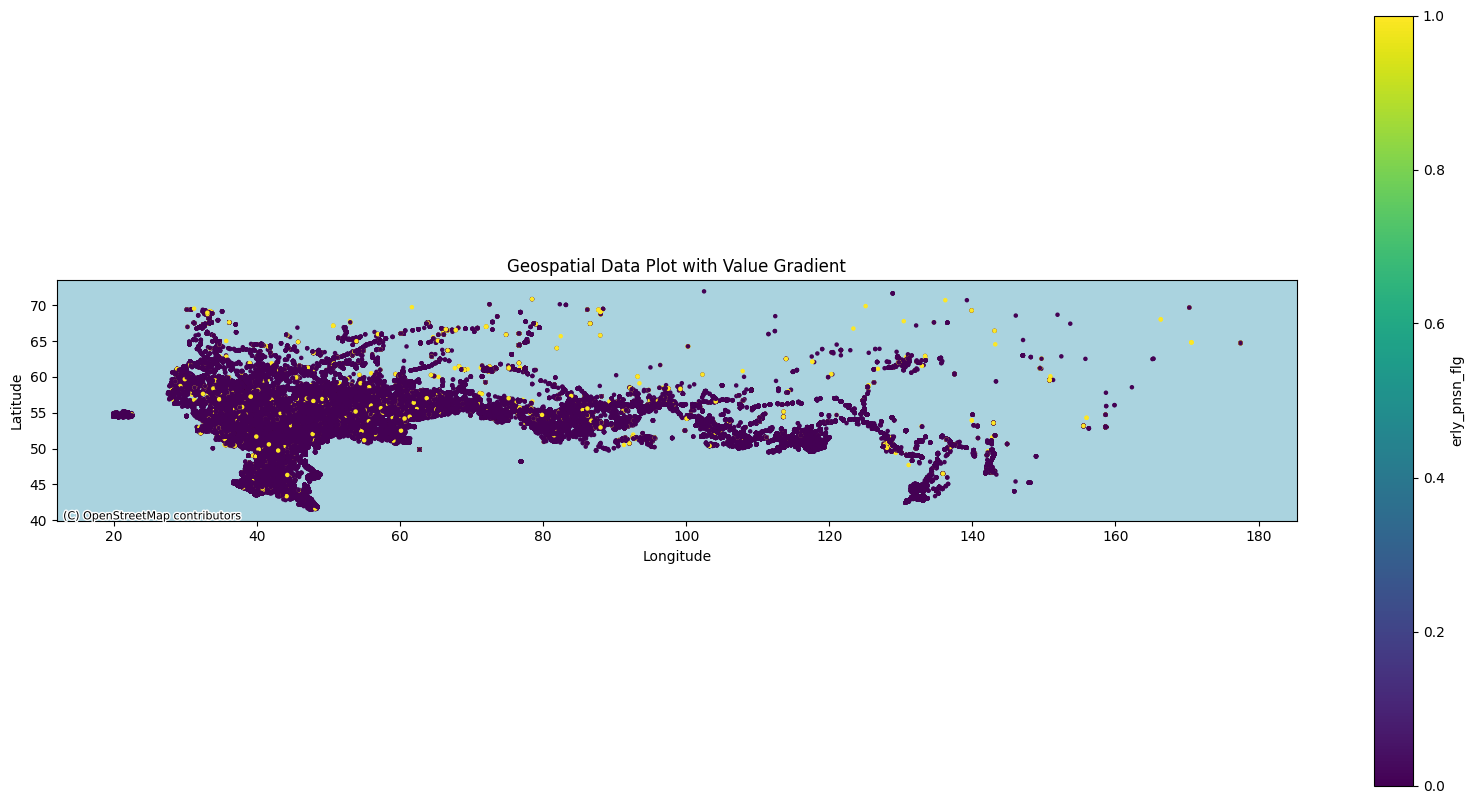

In [315]:
fig, ax = plt.subplots(figsize=(20, 10))

gdf.plot(ax=ax, column='erly_pnsn_flg', cmap='viridis', markersize=5, legend=True, legend_kwds={'label': "erly_pnsn_flg"})

ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Geospatial Data Plot with Value Gradient')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
df[num].corr()

In [ ]:
df[df['erly_pnsn_flg'] == 0][cat]

In [ ]:
sns.histplot(data=df, x='erly_pnsn_flg', hue='gndr', stat='probability')

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True)
sns.histplot(data=df[df['gndr'] == 'ж'], x='erly_pnsn_flg', stat='probability', ax=axs[0])
sns.histplot(data=df[df['gndr'] == 'м'], x='erly_pnsn_flg', stat='probability', ax=axs[1])

In [ ]:
df['accnt_status'].unique()

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True)

sns.histplot(data=df[df['accnt_status'] == 'Накопительный период'], x='erly_pnsn_flg', stat='probability', ax=axs[0])
sns.histplot(data=df[df['accnt_status'] == 'Выплатной период'], x='erly_pnsn_flg', stat='probability', ax=axs[1])

In [ ]:
df[df['accnt_status'] == 'Накопительный период'].groupby('gndr')['prsnt_age'].min()

In [ ]:
# cat_t = cat.append(pd.Index(['erly_pnsn_flg']))
# n_cat_t = cat_t.shape[0]
n_cat_t = cat.shape[0]
c1 = 'erly_pnsn_flg'
df_c1 = df[c1]
for i in range(n_cat_t):
#     for j in range(i + 1, n_cat_t):
    c2 = cat[i]
    
    cont_table = pd.crosstab(df[c2], df_c1, normalize='index')
    plt.figure(figsize=(10, 6))
    sns.heatmap(cont_table, annot=True, cmap='YlGnBu')
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.title(f'P({c1}|{c2})')
    plt.show()
        

In [ ]:
# Create a contingency table
cont_table = pd.crosstab(df['gndr'], df['erly_pnsn_flg'], normalize='index')

# Plot the conditional probability distribution
plt.figure(figsize=(10, 6))
sns.heatmap(cont_table, annot=True, cmap='YlGnBu')
plt.xlabel('B')
plt.ylabel('A')
plt.title('P(B|A)')
plt.show()
